<a href="https://colab.research.google.com/github/KamiraPagulayan/CCMACLRL_EXERCISES_COM222ML/blob/main/EXERCISE_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [66]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [67]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display one raw image directly from your drive

In [69]:
def displayImage(image_path):
  # Path to your image file in Google Drive
  image = Image.open(image_path)

  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()

In [70]:
!pip install pyheif

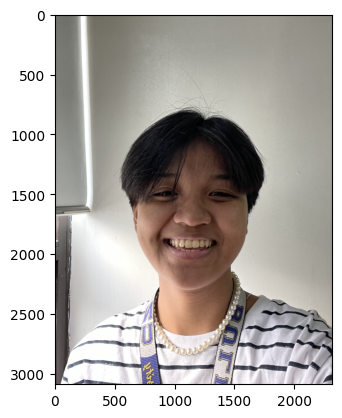

In [71]:
displayImage('/content/drive/My Drive/Machine Learning/Images/Train/Kamira Pagulayan/IMG_8745.jpg')

## Load the images from your drive and apply preprocessing to your raw images

In [72]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (100, 100))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

## Display one pre-processed image from the training set

In [73]:
images, labels = load_images_from_folder('/content/drive/My Drive/Machine Learning/Images/Train')

ValueError: 'BGR2RGB' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

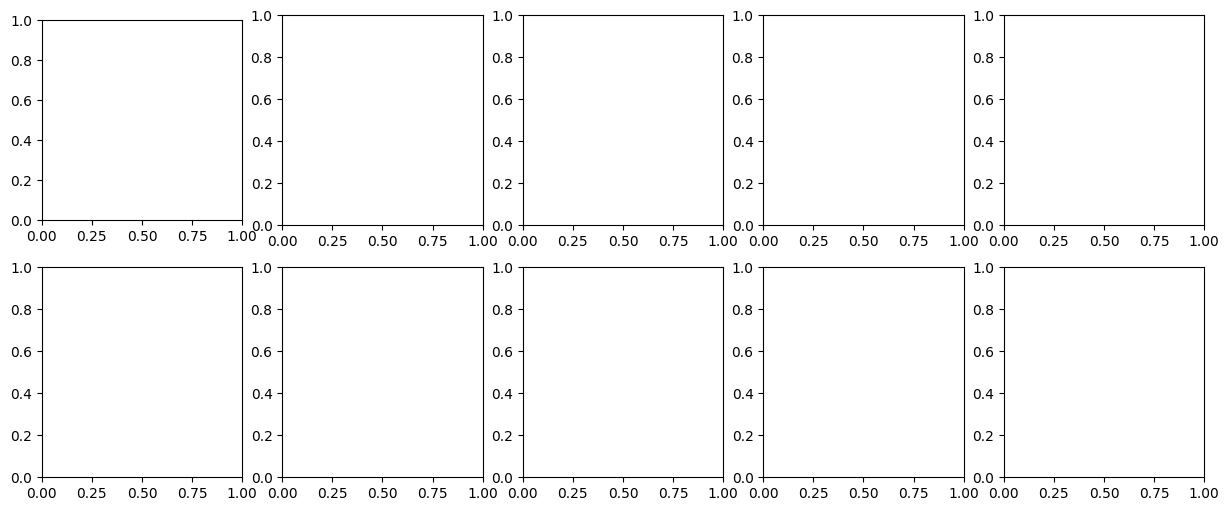

In [92]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='BGR2RGB')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Display ten pre-processed images from the training set

In [74]:
images.shape

(179, 10000)

In [75]:
labels.shape

(179,)

In [76]:
labels

array(['Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulayan',
       'Kamira Pagulayan', 'Kamira Pagulayan', 'Kamira Pagulay

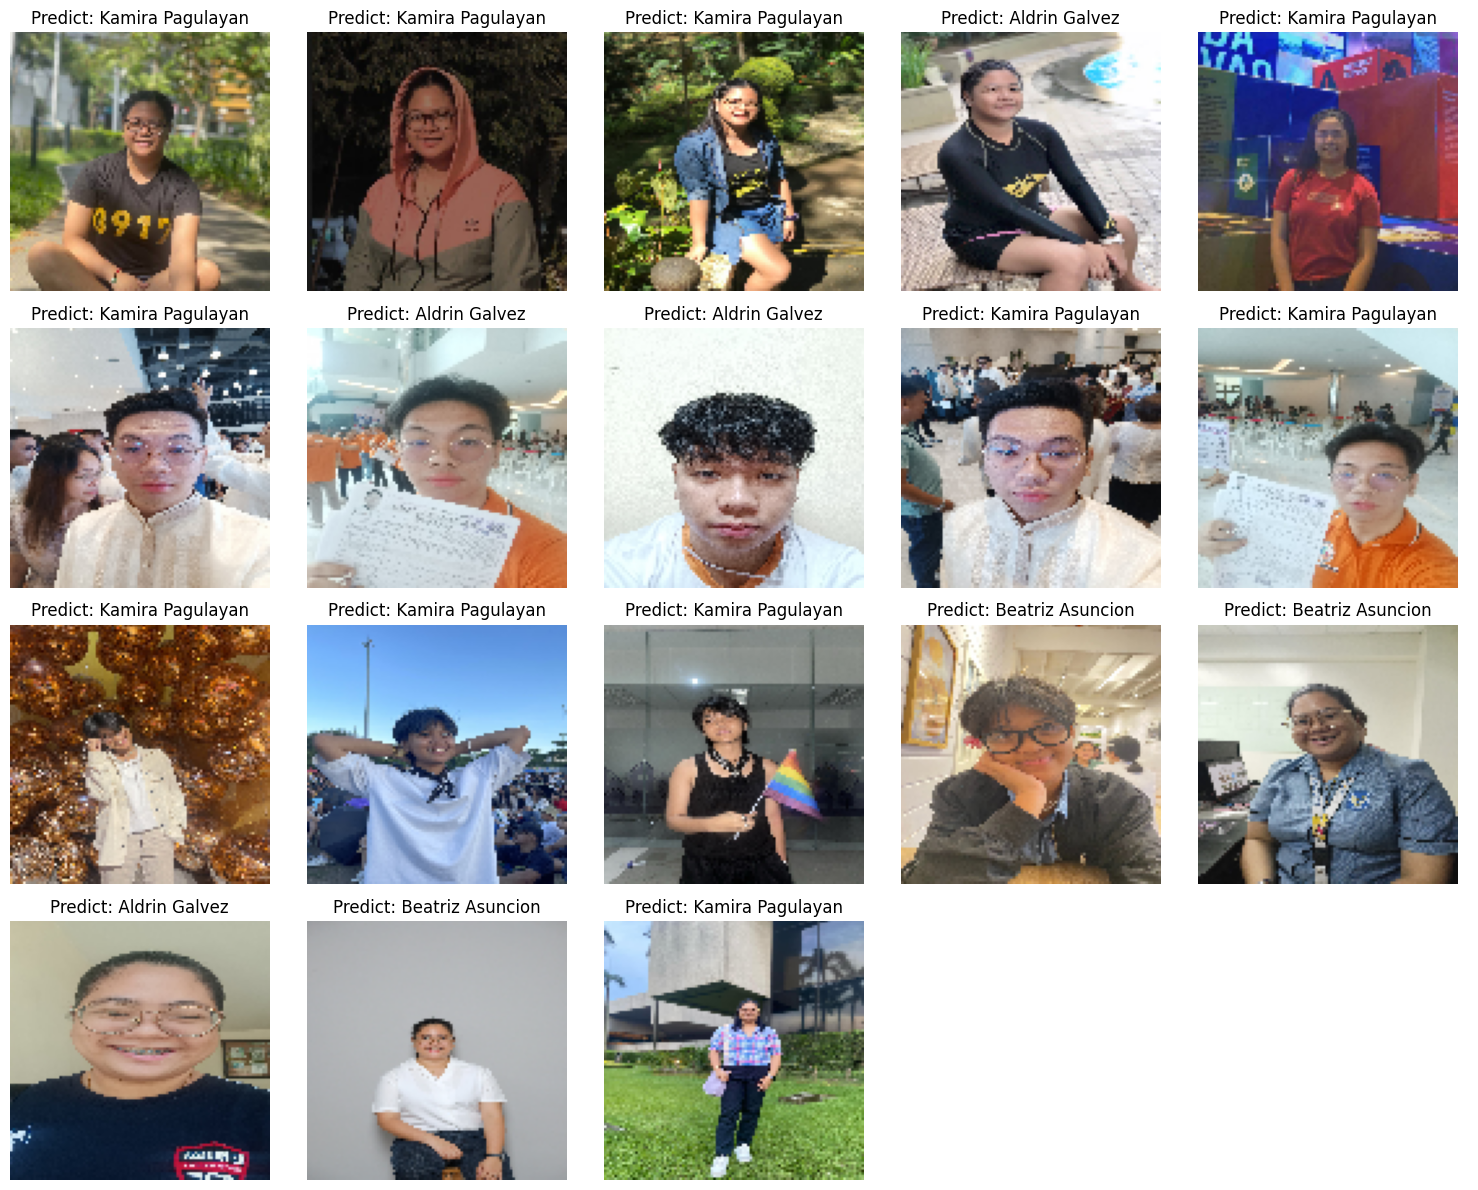

In [95]:
import math

test_folder = '/content/drive/MyDrive/Machine Learning/Images/Test/'
image_files = [f for f in os.listdir(test_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.JPG'))]

num_images = len(image_files)
cols = 5  # You want 5 columns
rows = math.ceil(num_images / cols)  # Dynamically calculate rows based on number of images

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))
axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

for i, img_file in enumerate(image_files):
    img_path = os.path.join(test_folder, img_file)
    prediction = predict_image(img_path, model)

    # Handle cases where image loading or prediction failed
    if prediction is None:
        continue

    image = cv2.imread(img_path)
    image = cv2.resize(image, (100, 100))

    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f'Predict: {prediction[0]}')
    axes[i].axis('off')

# Hide any unused subplots if the number of images is not a multiple of 5
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Split your data

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train your SVM model

In [79]:
from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)

SVC()

## Evaluate your model

In [80]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


## Test your model using images not in your training set

Test one image of yourself

In [81]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Test one image of your partner

Predicted label: ['Aldrin Galvez']


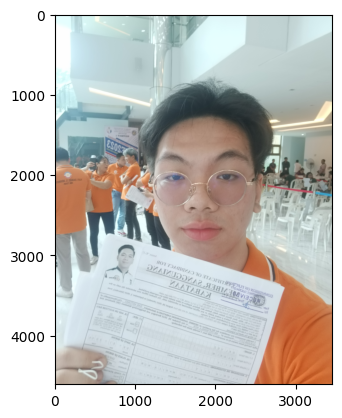

In [82]:
img_path = '/content/drive/My Drive/Machine Learning/Images/Test/IMG_20230903_133536_193.jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Beatriz Asuncion']


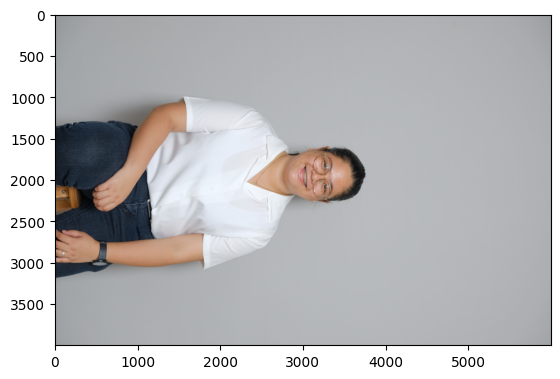

In [90]:
img_path = '/content/drive/My Drive/Machine Learning/Images/Test/DSCF0091.JPG'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Predicted label: ['Kamira Pagulayan']


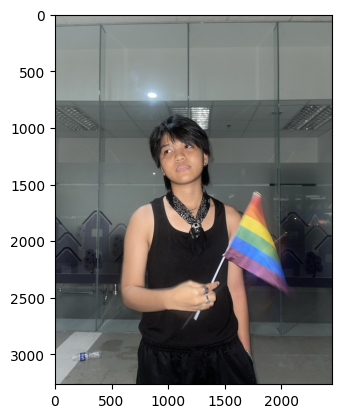

In [87]:
img_path = '/content/drive/My Drive/Machine Learning/Images/Test/Image (1).jpg'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)